<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/ML-Practice/blob/main/KNN_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>Build a recommender system which would recommend the 5 most similar movies to a movie query. </b>

### Suppose you are working at IMDB and you want to find out which movies are similar to a given movie. We can use kNN algorithm to identify the most similar movies. In the given dataset, we are given a lot of information about a particular movie. We need to restrict ourselves to the columns, Movie ID, Movie Name, IMDB Rating and binary indicators of different genres. 

### A sample dataset might look like :





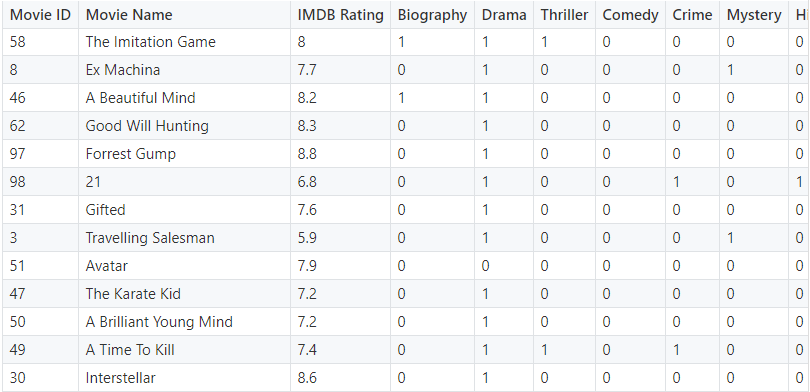

### You can keep all the genres indicators as columns. Suppose in the column genres, you have 20 distinct genres then you will create 20 different indicators.

### Also you need to take any 1000 movies in your train dataset and 10 movies in your test corresponding to which you need to print the 5 most similar movies since kNN becomes computationally intensive as the number of observations increases.

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/imdb_data.csv')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [164]:
df.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [167]:
genres_df=df.loc[:,['id','title','popularity','genres']]

In [168]:
genres_df

,id,title,popularity,genres
0,1,Hot Tub Time Machine 2,6.575393,[Comedy]
1,2,The Princess Diaries 2: Royal Engagement,8.248895,"[Comedy, Drama, Family, Romance]"
2,3,Whiplash,64.299990,[Drama]
3,4,Kahaani,3.174936,"[Thriller, Drama]"
4,5,Marine Boy,1.148070,"[Action, Thriller]"
...,...,...,...,...
2995,2996,Chasers,9.853270,"[Comedy, Romance]"
2996,2997,We Are the Best!,3.727996,"[Drama, Music]"
2997,2998,The Long Kiss Goodnight,14.482345,"[Crime, Action, Mystery, Thriller]"
2998,2999,Along Came Polly,15.725542,"[Comedy, Romance]"


In [153]:
df = df[df['genres'].notna()]

In [154]:
import ast
df.genres=df.genres.apply(lambda x : ast.literal_eval(x))

In [155]:
df.genres[0][0]

{'id': 35, 'name': 'Comedy'}

In [156]:
df.genres

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2995    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2996    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2997    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2998    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2999    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 2993, dtype: object

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2993 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 2993 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               945 non-null    object 
 5   imdb_id                2993 non-null   object 
 6   original_language      2993 non-null   object 
 7   original_title         2993 non-null   object 
 8   overview               2985 non-null   object 
 9   popularity             2993 non-null   float64
 10  poster_path            2992 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2941 non-null   object 
 13  release_date           2993 non-null   object 
 14  runtime                2991 non-null   float64
 15  spok

In [158]:
all_genres_list=[]
for index,row in df.iterrows():
  genre = df.loc[index, 'genres']
  genres_list = []
  for i in genre:
    genres_list.append(i['name'])
    all_genres_list.append(i['name'])
  df["genres"][index]=genres_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [159]:
df.genres

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres, Length: 2993, dtype: object

In [162]:
all_genres_list=np.unique(all_genres_list)

In [163]:
all_genres_list

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

In [171]:
for i in all_genres_list:
  genres_df[i]=0

In [ ]:
list(genres_df.columns)

In [178]:
for index,row in genres_df.iterrows():
  genres_row=df.loc[index, 'genres']
  for i in genres_row:
    


['Comedy']
['Comedy', 'Drama', 'Family', 'Romance']
['Drama']
['Thriller', 'Drama']
['Action', 'Thriller']
['Animation', 'Adventure', 'Family']
['Horror', 'Thriller']
['Documentary']
['Action', 'Comedy', 'Music', 'Family', 'Adventure']
['Comedy', 'Music']
['Drama']
['Comedy']
['Drama']
['Comedy', 'Crime']
['Action', 'Thriller', 'Science Fiction', 'Mystery']
['Action', 'Crime', 'Drama']
['Horror', 'Thriller']
['Drama', 'Romance']
['Comedy', 'Romance']
['Action', 'Thriller', 'Crime']
['Adventure', 'Family', 'Science Fiction']
['Horror', 'Thriller']
['Thriller', 'Horror']
['Thriller', 'Mystery', 'Foreign']
['Horror', 'Comedy']
['Comedy', 'Horror', 'Mystery', 'Thriller']
['Crime', 'Drama', 'Mystery', 'Thriller']
['Drama', 'Comedy', 'Romance']
['Animation']
['Action', 'Adventure', 'Crime', 'Thriller']
['Drama', 'Comedy']
['Mystery', 'Drama', 'Thriller']
['Fantasy', 'Action', 'Adventure']
['Horror']
['Action', 'Comedy', 'Crime', 'Thriller']
['Action', 'Crime', 'Thriller']
['Comedy', 'Romance